Importing the necesaary libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib


Loading the daatset

In [13]:

filepath = '/Users/apple/Desktop/CS/Machine Learning/Projects/SCMS_Delivery_History_Dataset.csv'
data = pd.read_csv(filepath)

Converting numerical columns to proper datatypes

In [14]:
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'], errors='coerce')
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')

Droppping rows with missing target or critical features 

In [15]:
data_cleaned = data.dropna(subset=['Freight Cost (USD)', 'Weight (Kilograms)', 'Shipment Mode'])

features = ['Country', 'Shipment Mode', 'Weight (Kilograms)', 'Line Item Quantity',
            'Line Item Value', 'Vendor INCO Term']
target = 'Freight Cost (USD)'

X = data_cleaned[features]
y = data_cleaned[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Preprocessing Pipeline

In [17]:

categorical_features = ['Country', 'Shipment Mode', 'Vendor INCO Term']
numerical_features = ['Weight (Kilograms)', 'Line Item Quantity', 'Line Item Value']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# Using Linear Regression and Random Forest


In [18]:

models = {
    "LinearRegression": Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    "RandomForest": Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
}

In [26]:

results = {}
predictions = {}
for model_name, model_pipeline in models.items():
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse
    predictions[model_name] = y_pred
    
    joblib.dump(model_pipeline, f"{model_name}_pipeline.pkl")


In [27]:

for model_name, mse in results.items():
    print(f"{model_name}: Mean Squared Error = {mse:.2f}")

LinearRegression: Mean Squared Error = 284219792.55
RandomForest: Mean Squared Error = 125307530.06


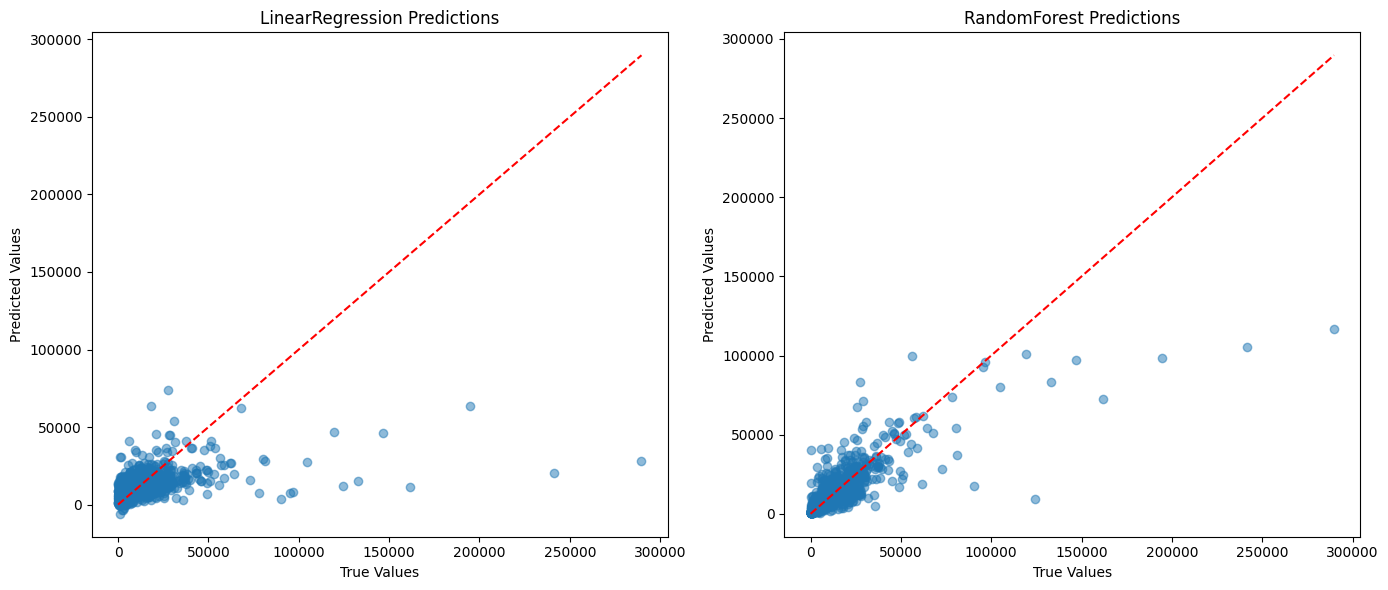

In [28]:
plt.figure(figsize=(14, 6))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{model_name} Predictions")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
plt.tight_layout()
plt.show()